# 앙상블

### 용어정리 

1. Bagging
2. Bootstrap
3. Aggregating
4. Hyper Parameter
41. Hard voting
42. Soft voting
5. Random foreset
6. Boosting

## 1. Bagging

의사결정트리의 단점은 과대적합되기 쉽다.

- 과대적합 : 예측값은 90%인데, 정확도는 80%인 경우
- 과소적합 : 두 값 모두 낮게 나오는 경우

굳이 비교하자면 과대적합이 더 낫다. 과대적합은 테스트를 다 했으니까.
배깅은 과대적합이 쉬운 모델링에 주로 사용된다.

하나의 알고리즘을 이용하여 예측하는 것이 아니라, 여러 개의 알고리즘을 이용하여 예측한다. (속담 : 백지장도 맞들면 낫다)

## 2. Bootstrap

데이터를 조금 편향되도록 샘플링하는 기법으로, 

- 데이터 샘플링시 편향을 높임으로써, 분산이 높은 모델의 과대적합 위험을 줄인다.

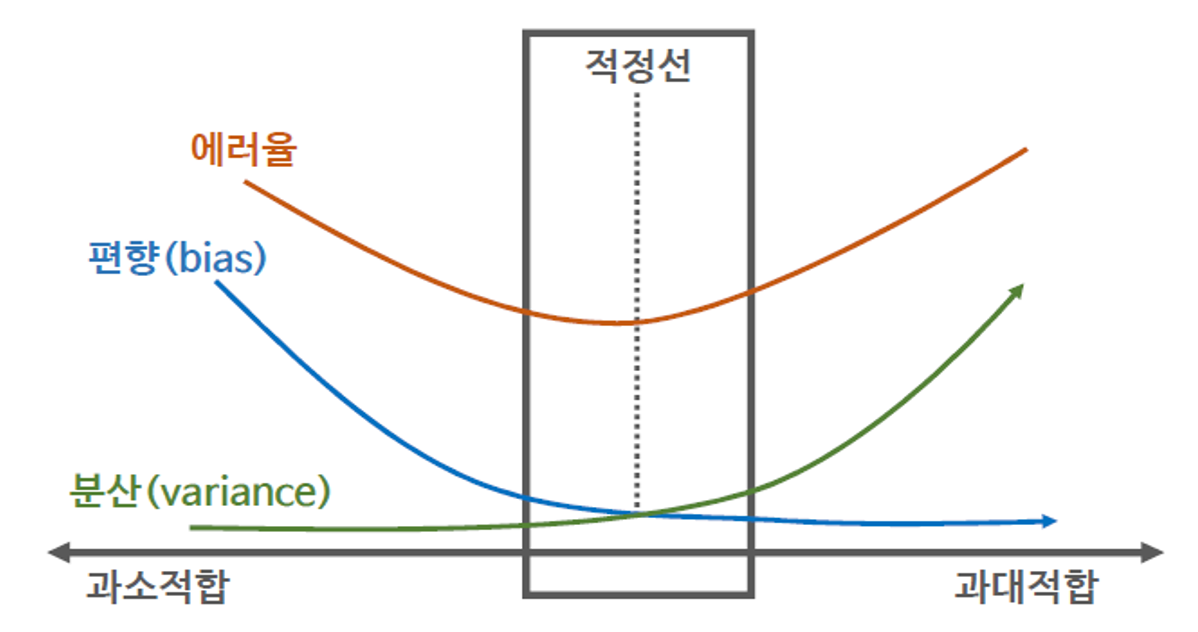

## 3. Hyper Parameter (미분)

- 하이퍼 파라미터는 모델링할 때 사용자가 직접 세팅하는 값을 의미한다.
- 편향과 분산을 조절하는 값을 하이퍼 파라미터라고 한다.

- SVM : C, Sigma
- KNN : K

## 4. Aggregating

여러 분류 모델이 예측한 값들을 조합하여 하나의 결론을 도출한다. (투표방식)

## 4-1. Hard voting

일반적인 투표방식과 동일하다

- 최다 득표를 받은 예측값으로 결론을 도출한다.

- 후보 : 1, 2, 3, 4, 5
- 득표 : 2, 1, 1, 1, 1
- 결과 : 1번 값을 최적값으로 결론낸다.

## 4-2. Soft voting

하드보팅보다 좀 더 정교한 투표방식이다.

- 하드보팅은 각 분류모델의 최대값을 도출하지만
- 소프트보팅은 모든 분류값의 확률을 도출한다.

후보 : 1, 2, 3, 4, 5

- 과정1 : 0.7, 0, 0, 0, 0.3
- 과정2 : 0.7, 0.1, 0.2, 0, 0
- 과정3 : 0.7, 0, 0, 0, 0.3
- 과정4 : 0.7, 0, 0, 0, 0.3
- 과정5 : 0.7, 0, 0, 0, 0.3

결과 : 1번 값이 1.4% 확률로 최적값으로 결론낸다. (소프트포팅은 중간값도 보여준다.)

하드보팅은 단순하게 가장 많은 투표를 받은 분류값을 어그리게이팅의 결론으로 도출

소프트보팅은 각 분류값별 확률을 누적하여 최대값을 결론으로 도출

## 5. Random forest

랜덤포레스트는 여러 의사결정트리를 배깅해서 예측을 실행하는 모델이다.

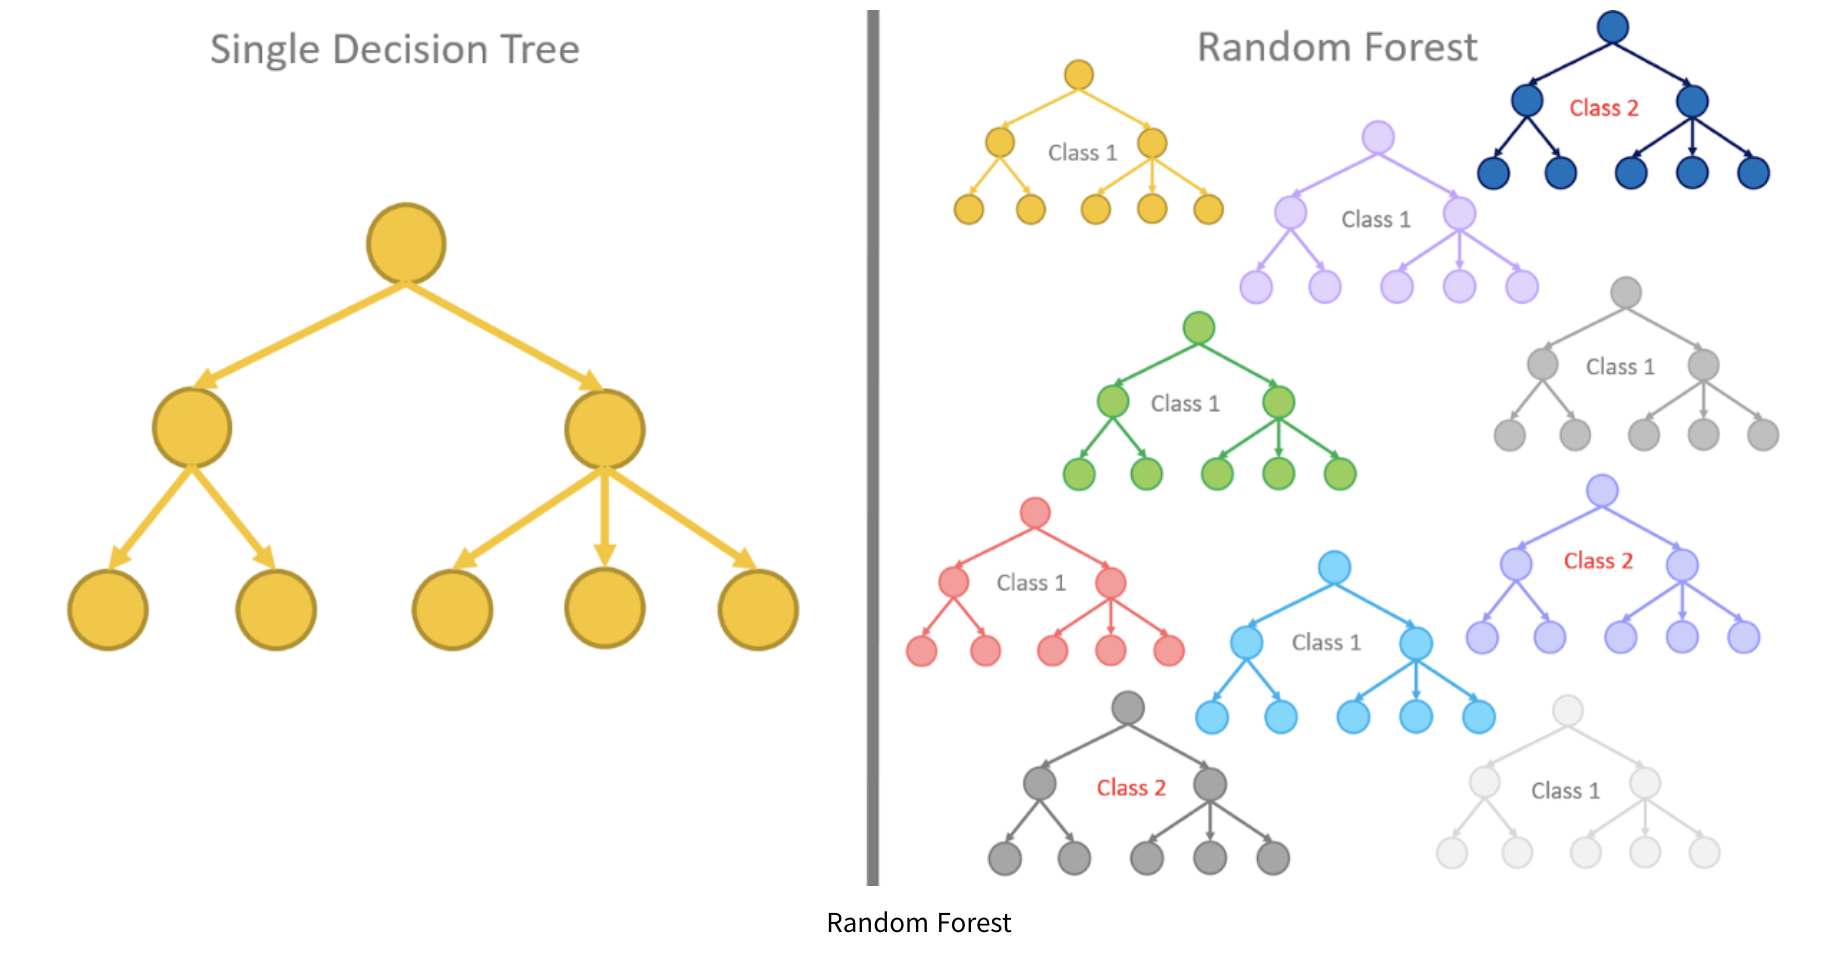

- 의사결정 트리는 최적의 특징으로 분기한다.
- 랜덤포레스트는 각 노드에 주어진 데이터를 샘플링하여 일부 데이터를 제외한 최적의 특징을 찾아 트리를 분기한다.
    - 또 한 번의 모델 편향을 증가시켜 과대적합의 위험을 감소시킨다.

## 6. Boosting

- 앙상블
    - 배깅 : 서로 다른 알고리즘에 기반한 분류
    - 부스팅 : 동일한 알고리즘에 기반한 분류(가중투표, 순차적 학습)
        - 순차적학습 : 낱말, 사전..
        - 가중 투표 : 9개의 투표보다 1개의 투표의 힘이 더 크다.

# 실습 : 랜덤포레스트 : MNIST (손글씨데이터)

In [1]:
from sklearn import datasets
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

np.random.seed(5)

- 손글시 데이터 호출

In [2]:
mnist = datasets.load_digits()
features, labels = mnist.data, mnist.target

print("데이터 : ", len(features))
print("정답 : ", len(labels))

데이터 :  1797
정답 :  1797


- 교차검증 : 10회

In [3]:
# 교차검증 함수 생성

def cross_validation(classifier, features, labels) :
    
    cv_scores = []
    
    for i in range(10):
        scores = cross_val_score(classifier, features, labels, # 학습평가 모델(분류), 학습용데이터, 학습용데이터 정답
                                cv=10,                         # 10회 교차검증 횟수
                                scoring='accuracy')            # 분석기준 : 정확도
        
        cv_scores.append(scores.mean())
        
    return cv_scores

- 의사결정트리 분석

In [4]:
dt_cv_scores = cross_validation(tree.DecisionTreeClassifier(), features, labels)
dt_cv_scores

[0.8280229671011794,
 0.8235630043451273,
 0.8224674115456239,
 0.8235692116697703,
 0.8341464928615766,
 0.8185692116697704,
 0.8241247672253259,
 0.8180136561142148,
 0.8235630043451272,
 0.8258038485412786]

- 랜덤포레스트 분석

In [5]:
rf_cv_scores = cross_validation(RandomForestClassifier(), features, labels)
rf_cv_scores

[0.9526939788950962,
 0.9487957790192427,
 0.9510211049037863,
 0.9549286157666046,
 0.9471322160148976,
 0.9487988826815641,
 0.952122905027933,
 0.9454531346989447,
 0.9460180012414648,
 0.9471322160148976]

- 두 개의 데이터 시각화 비교

<AxesSubplot:>

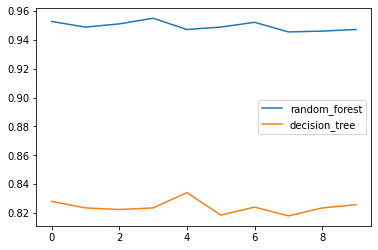

In [6]:
cv_list = [
    ['random_forest', rf_cv_scores],
    ['decision_tree', dt_cv_scores]
]

df = pd.DataFrame.from_dict(dict(cv_list))

df.plot()

- 정확도 확인

In [7]:
# 의사결정트리 정확도
print("의사결정트리 정확도 : ", np.mean(dt_cv_scores))


# 랜덤포레스트 정확도
print("랜덤포레스트 정확도 : ", np.mean(rf_cv_scores))

의사결정트리 정확도 :  0.8241843575418993
랜덤포레스트 정확도 :  0.9494096834264433


# 실습 : 손글씨 분류(보팅 앙상블)

In [8]:
from sklearn import datasets
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

np.random.seed(5)

import warnings
warnings.filterwarnings(action='ignore')

- 손글씨 데이터 호출

In [9]:
mnist = datasets.load_digits()
features, labels = mnist.data, mnist.target

train_data, test_data, train_label, test_label = train_test_split(features, labels,
                                                                 test_size=0.2)

- 모델링 : 의사결정트리, SVM, KNN 의 알고리즘으로 정확도를 보겠다.

In [10]:
# 의사결정트리 분석
dtree = tree.DecisionTreeClassifier(criterion='gini',
                                   max_depth=8,
                                   max_features=32,
                                   random_state=35)

dtree = dtree.fit(train_data, train_label)
dtree_predicted = dtree.predict(test_data)

# kNN 분석
knn = KNeighborsClassifier(n_neighbors=299).fit(train_data, train_label)
knn_predicted = knn.predict(test_data)

# SVM 분석
svm = SVC(C=0.1, gamma=0.003, probability=True, random_state=35).fit(train_data, train_label)
svm_predicted = svm.predict(test_data)

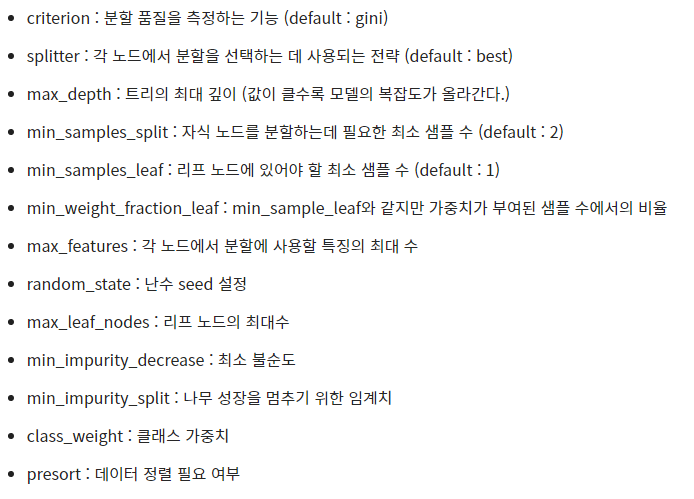

In [11]:
print("정확도")
print()
print('d-tree : ', accuracy_score(test_label, dtree_predicted))
print()
print('kNN : ', accuracy_score(test_label, knn_predicted))
print()
print('svm : ', accuracy_score(test_label, svm_predicted))

정확도

d-tree :  0.8277777777777777

kNN :  0.8944444444444445

svm :  0.8916666666666667


- predict_proba() 함수를 이용하여 각 샘플에 대해 어느 클래스에 속할지의 확률을 0 ~ 1.0 사이의 값으로 반환한다.

In [12]:
svm_proba = svm.predict_proba(test_data)

print(svm_proba[0:2])

[[0.00129293 0.00434548 0.00446459 0.00248053 0.00336731 0.93848315
  0.00127073 0.00448341 0.02477231 0.01503956]
 [0.00189233 0.00631647 0.92958418 0.00345522 0.0030971  0.00828454
  0.00186869 0.0048112  0.03092707 0.0097632 ]]


## 하드보팅

하드보팅은 일반적인 투표방식과 같다.

각각의 분류기의 예측값들을 모아서, 가장 많은 득표를 받은 값으로 결론을 도출한다.

| 파라미터 | 설명 |
|-|-|
| estimators | 개별 모형 목록 (리스트 등의 형식으로 입력) |
| voting | 문자열 {hard, soft} |
| weights | 사용자 가중치값|

In [13]:
voting_clf = VotingClassifier(estimators=[
    ('decision_tree', dtree),
    ('knn', knn),
    ('svm', svm)],
                             weights=[1, 1, 1],
                             voting='hard').fit(train_data, train_label)

hard_voting_predicted = voting_clf.predict(test_data)

accuracy_score(test_label, hard_voting_predicted)

0.9222222222222223

## 소프트보팅

소프트보팅은 각각의 분류모델의 predict_proba을 활용하여 모든 분류값들의 확률들을 더해서 가장 높은 점수를 획득한 분류값으로 최종 결론을 도출한다.

In [14]:
voting_clf = VotingClassifier(estimators=[
    ('decision_tree', dtree),
    ('knn', knn),
    ('svm', svm)],
                             weights=[1, 1, 1],
                             voting='soft').fit(train_data, train_label)

soft_voting_predicted = voting_clf.predict(test_data)

accuracy_score(test_label, soft_voting_predicted)

0.8888888888888888

([<matplotlib.axis.XTick at 0x7f9aa79cd670>,
 [Text(0, 0, 'decision_tree'),
  Text(1, 0, 'knn'),
  Text(2, 0, 'svm'),
  Text(3, 0, 'hard_voting'),
  Text(4, 0, 'soft_voting')])

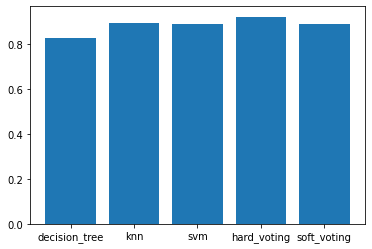

In [15]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(5)

plt.bar(x, height=[
    accuracy_score(test_label, dtree_predicted),
    accuracy_score(test_label, knn_predicted),
    accuracy_score(test_label, svm_predicted),
    accuracy_score(test_label, hard_voting_predicted),
    accuracy_score(test_label, soft_voting_predicted)
])

# x축의 이름설정
plt.xticks(x, ['decision_tree', 'knn', 'svm', 'hard_voting', 'soft_voting'])

--------------------------------------------------------------------------------------------------

# 비지도학습

### K-평균 알고리즘

### 실습 : 학생들을 3개의 그룹으로 분류한다.

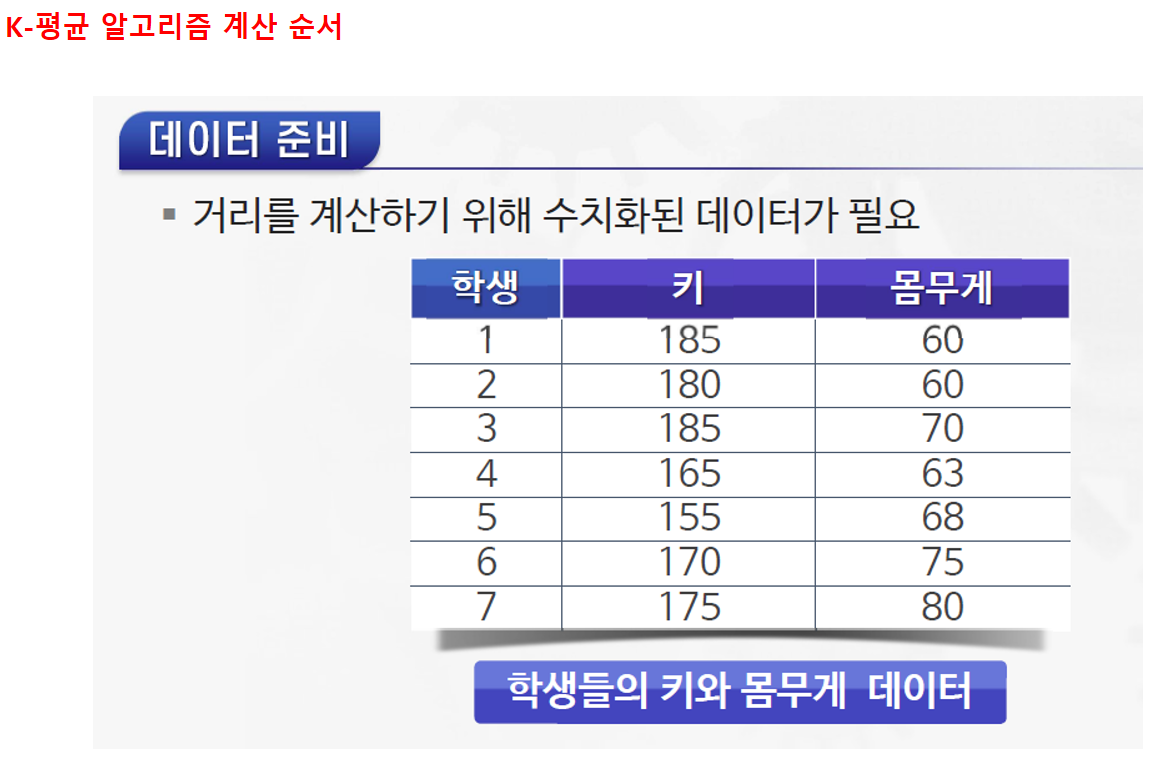

In [16]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(5)

import warnings
warnings.filterwarnings(action='ignore')

- 데이터 생성

In [17]:
df = pd.DataFrame(columns=['height', 'weight'])
df.loc[0] = [185, 60]
df.loc[1] = [180, 60]
df.loc[2] = [185, 70]
df.loc[3] = [165, 63]
df.loc[4] = [155, 68]
df.loc[5] = [170, 75]
df.loc[6] = [175, 80]

df

,height,weight
0,185,60
1,180,60
2,185,70
3,165,63
4,155,68
5,170,75
6,175,80


- 데이터 시각화

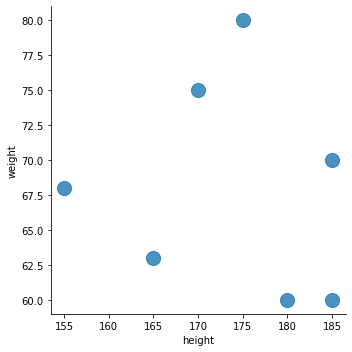

In [18]:
sns.lmplot('height', 'weight', data=df, fit_reg=False,
          scatter_kws={'s':200})

## K-평균 군집화

In [19]:
df.index

Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64')

In [20]:
df.values

array([[185, 60],
       [180, 60],
       [185, 70],
       [165, 63],
       [155, 68],
       [170, 75],
       [175, 80]], dtype=object)

In [21]:
# k-평균 모델로 학습 -> 특징들을 분석한다.

data_points = df.values

kmeans = KMeans(n_clusters=3).fit(data_points)

In [22]:
# 각 클래스의 중심점을 확인

kmeans.cluster_centers_

array([[160.        ,  65.5       ],
       [183.33333333,  63.33333333],
       [172.5       ,  77.5       ]])

- 데이터가 어느 군집에 속해있는지 df 변수에 cluster_id 열을 추가한다.

In [23]:
df['cluster_id'] = kmeans.labels_

In [24]:
df

,height,weight,cluster_id
0,185,60,1
1,180,60,1
2,185,70,1
3,165,63,0
4,155,68,0
5,170,75,2
6,175,80,2


- 데이터 시각화

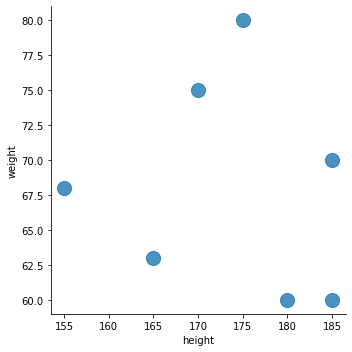

In [25]:
# 그룹별로 색상 구분
sns.lmplot('height', 'weight', data=df, fit_reg=False,
          scatter_kws={'s':200})

https://archive.ics.uci.edu/ml/index.php

# 실습 : wholesale customers(도매업 고객)

### 도매업 고객 데이터 셋

- 각 고객의 연간 구매 금액을 상품별로 구분하여 정리한 데이터이다.
- 8개 필드에 440개의 행으로 구성되어 있다.
- 맨 처음 2개 열은 고객데이터이다. (구매 내역 아님)

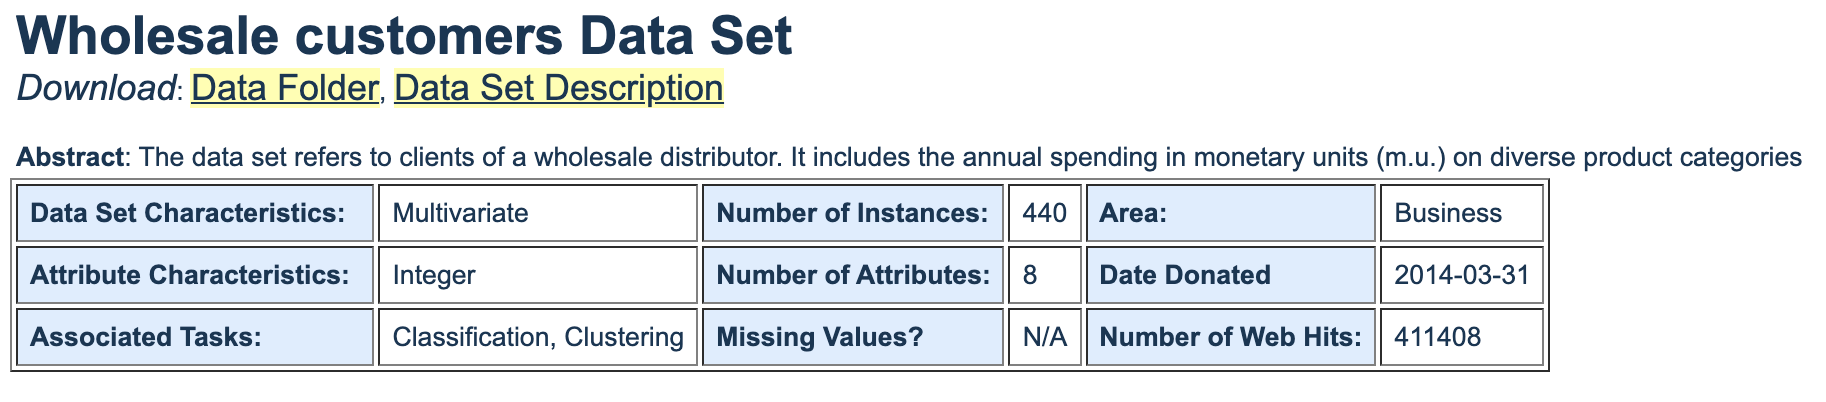

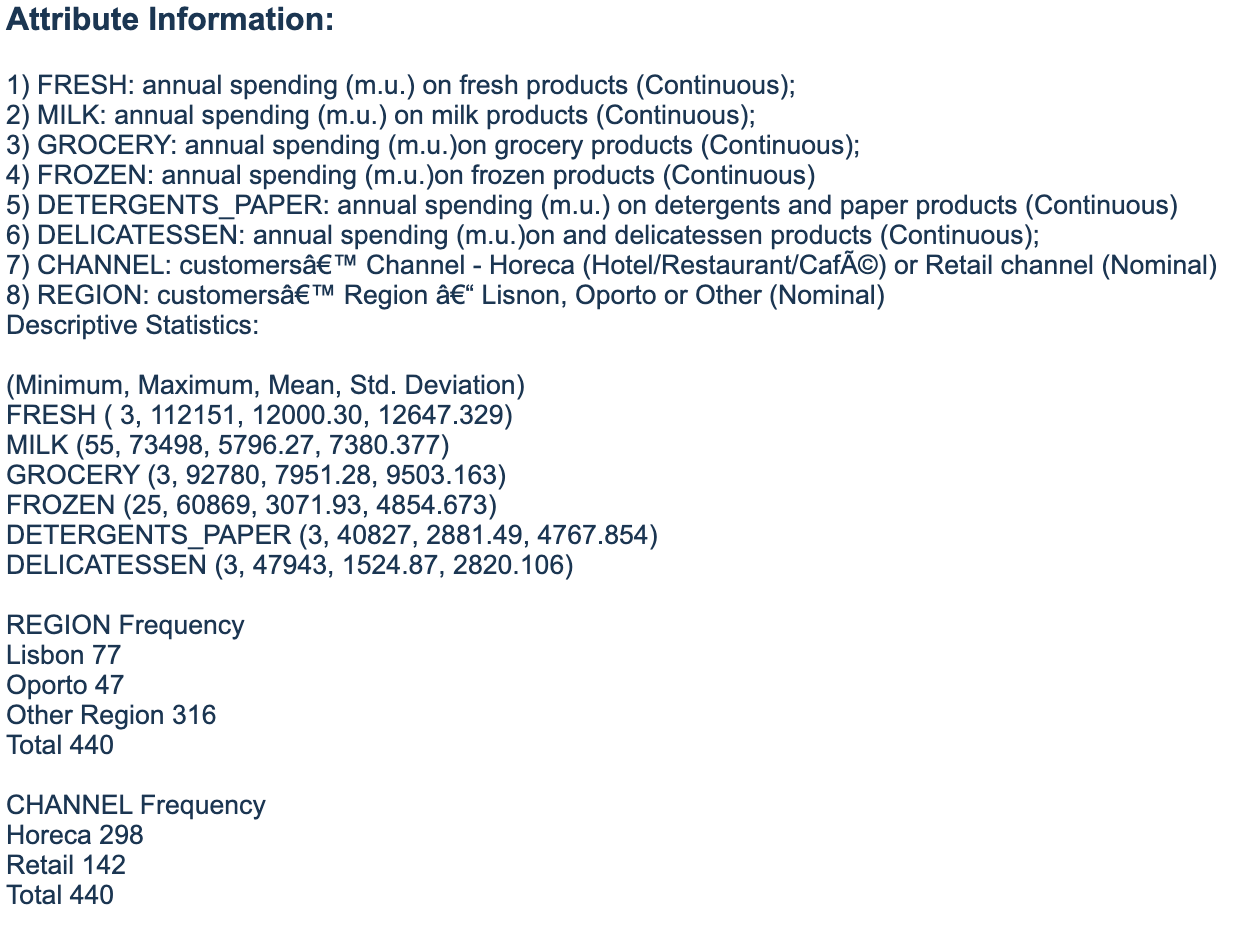

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
# 파일 다운로드
#uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale customers data.csv'

df = pd.read_csv('Wholesale customers data.csv', header=0) # 헤더위치 지정

#### 고객 정보

1. Channel : 호텔, 레스토랑 또는 소매점 등의 판매 채널을 의미한다.
2. Region : 고객 소재지를 의미한다.

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [29]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


# 데이터 스케일 변환

1. StandardScaler
    - 각 특성의 평균을 0, 분산을 1로 변경하여 특성의 스케일을 맞춘다.
    - 최소값과 최대값의 크기를 제한하지 않는다.

2. RobustScaler
    - 평균과 분산 대신에 중간값과 사분위값을 사용한다.
    - 중간 값을 정렬시 중간에 있는 값을 의미하고
    - 사분위값은 1/4, 3/4분기에 위치한 값을 의미한다.

3. MinMaxScaler
    - 모든 특성이 0과 1사이에 위치하도록 데이터를 변경한다.

4. Normalizer(정규화)
    - 유클리디안 길이가 1이 되도록 조정한다.

In [30]:
# 모든 행과 열의 데이터를 가져온다.
X = df.iloc[:, :]

# 맨 앞의 5행만 출력
X[:5]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [31]:
len(X)

440

- 학습 데이터를 정규화하면 서로 다른 변수사이에 존재할 수 있는 데이터값의 상대적 크기차이에서 발생할 수 있는 오류를 제거할 수 있다.
- 변수 데이터를 정규화한다.
- 모든 데이터 포인트가 동일한 정도의 (0 ~ 1.0) 스케일(중요도)로 반영되도록 한다.
- 데이터 분포의 차이를 정규화한다.

In [32]:
from sklearn import preprocessing

X = preprocessing.StandardScaler().fit(X).transform(X)

X[:5]

array([[ 1.44865163,  0.59066829,  0.05293319,  0.52356777, -0.04111489,
        -0.58936716, -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197,  0.54445767,  0.17031835,
        -0.27013618,  0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926,  0.40853771, -0.0281571 ,
        -0.13753572,  0.13323164,  2.24329255],
       [-0.69029709,  0.59066829,  0.10011141, -0.62401993, -0.3929769 ,
         0.6871443 , -0.49858822,  0.09341105],
       [ 1.44865163,  0.59066829,  0.84023948, -0.05239645, -0.07935618,
         0.17385884, -0.23191782,  1.29934689]])

### K-평균 모형

In [54]:
from sklearn import cluster

kmeans = cluster.KMeans(init='k-means++',
                       n_clusters=5, n_init=10)

- init='k-means++' : 초기 중앙점을 결정하는 방법
- n_clusters=5 : 5개의 그룹으로 구분하겠다.
- n_init=10 : 초기 중앙점이 무작위로 선택되는데 초기값을 몇회 실행할지 결정

In [55]:
# 모델링

kmeans.fit(X)

KMeans(n_clusters=5)

In [56]:
# 예측 : 실행할 때마다 달라질 수 있다.

cluster_label = kmeans.labels_
cluster_label

# 그룹의 정보 0 ~ 4

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 4, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 3, 0, 0, 1, 1, 0, 0, 1, 1, 3, 0, 1, 1, 0, 3, 0, 0, 1, 3,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 3, 3, 1,
       1, 1, 1, 1, 3, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 2, 0,
       2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 3, 2, 2, 0, 2, 0, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 0, 2, 0, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 2, 0,

- 예측결과를 데이터프레임에 추가

In [57]:
df['cluster'] = cluster_label

df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,0
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,1
436,1,3,39228,1431,764,4510,93,2346,1
437,2,3,14531,15488,30243,437,14841,1867,0
438,1,3,10290,1981,2232,1038,168,2125,1


- 데이터 시각화 : 산점도(scatter)

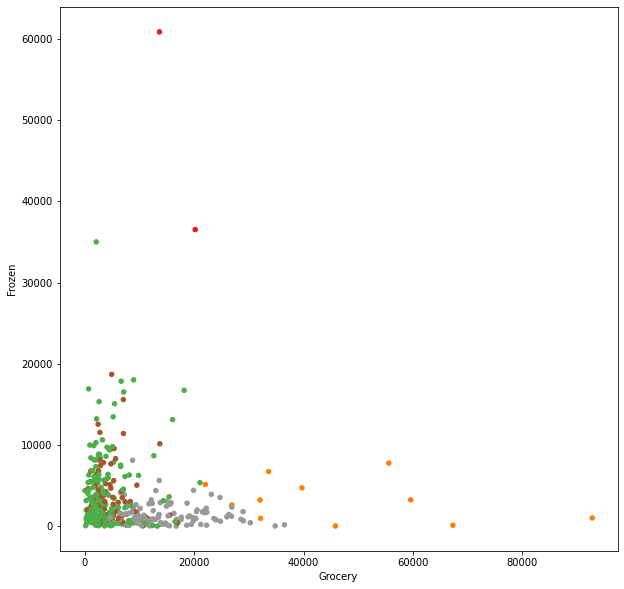

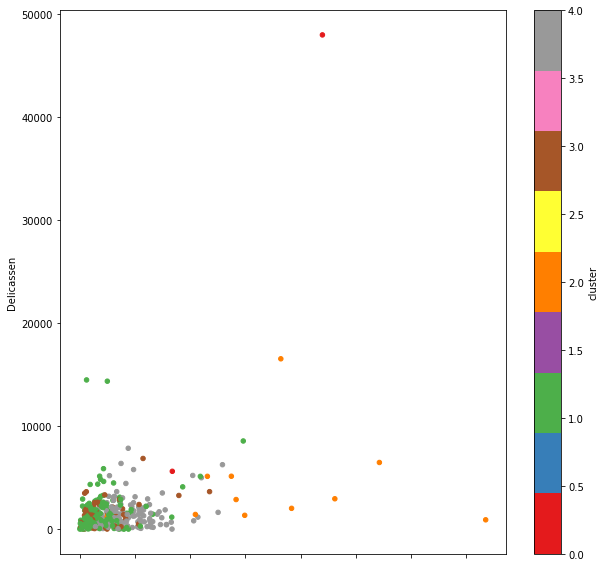

In [49]:
# Grocery : 식료품, Frozen : 냉동식품

df.plot(kind='scatter',
       x='Grocery',
       y='Frozen',
        cmap='Set1',
        c='cluster',
       colorbar=False,
       figsize=(10,10))

# Milk : 유제품, Delicassen : 조제식품점

df.plot(kind='scatter',
       x='Milk',
       y='Delicassen',
        cmap='Set1',
        c='cluster',
       colorbar=True,
       figsize=(10,10))

plt.show()

- 표본편차가 큰 항목을 제거한다.

In [58]:
mask = (df['cluster'] == 3) | (df['cluster'] == 4)
ndf = df[~mask] # ~ 부정의 의미

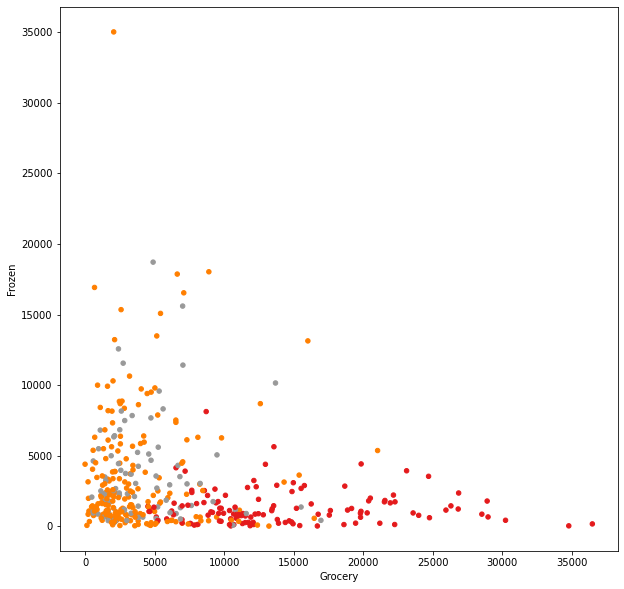

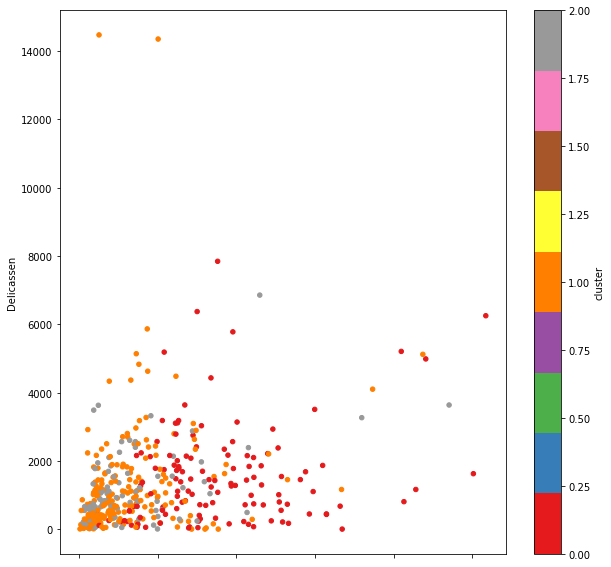

In [59]:
# Grocery : 식료품점, Frozen: 냉동식품

ndf.plot(kind='scatter', x = 'Grocery', y = 'Frozen', c = 'cluster',
       cmap = 'Set1', colorbar = False, figsize=(10, 10))

# Milk : 우유, Delicassen : 조제식품점
ndf.plot(kind='scatter', x = 'Milk', y = 'Delicassen', c = 'cluster',
       cmap = 'Set1', colorbar = True, figsize=(10, 10))

plt.show()

# 실습 : 붓꽃 분류

In [60]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

In [61]:
# 붗꽃 데이터 호출
iris = pd.read_csv('iris.csv')
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Name         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


- 샘플로 2개 항목만 선택

In [62]:
irisDF = iris[['SepalLength', 'PetalLength']]
irisDF.head()

,SepalLength,PetalLength
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


In [63]:
model = KMeans(n_clusters=3, random_state=0, algorithm='auto')
model.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

In [64]:
predicted = model.predict(irisDF)
predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

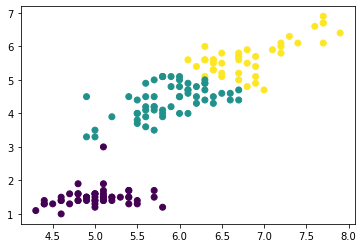

In [65]:
plt.scatter(x=irisDF['SepalLength'], y=irisDF['PetalLength'], c=predicted)

In [66]:
# 중앙값 확인
centers = model.cluster_centers_
centers

array([[5.00784314, 1.49411765],
       [5.87413793, 4.39310345],
       [6.83902439, 5.67804878]])

- 중앙값을 시각화

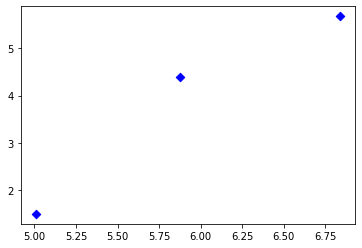

In [67]:
plt.scatter(x=centers[:, 0], y=centers[:, 1], 
           marker='D', c='b')
plt.show()

- 합친다.

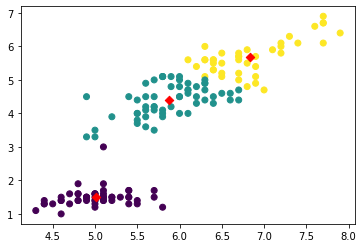

In [69]:
plt.scatter(x=irisDF['SepalLength'], y=irisDF['PetalLength'], c=predicted)
plt.scatter(x=centers[:, 0], y=centers[:, 1], marker='D', c='r')
plt.show()

# 계층적 군집화

### 실습 : iris

In [70]:
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()

In [73]:
labels = pd.DataFrame(iris.target)
labels.columns = ['labels']

data = pd.DataFrame(iris.data)
data.columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']

data = pd.concat([data, labels], axis=1)

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal Length  150 non-null    float64
 1   Sepal Width   150 non-null    float64
 2   Petal Length  150 non-null    float64
 3   Petal Width   150 non-null    float64
 4   labels        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [75]:
data.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


- iris 데이터를 Dendrogram 시각화

In [76]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

- single : 단일기준결합방식
- complete : 완전기준결합방식
- average : 평균기준결합방식

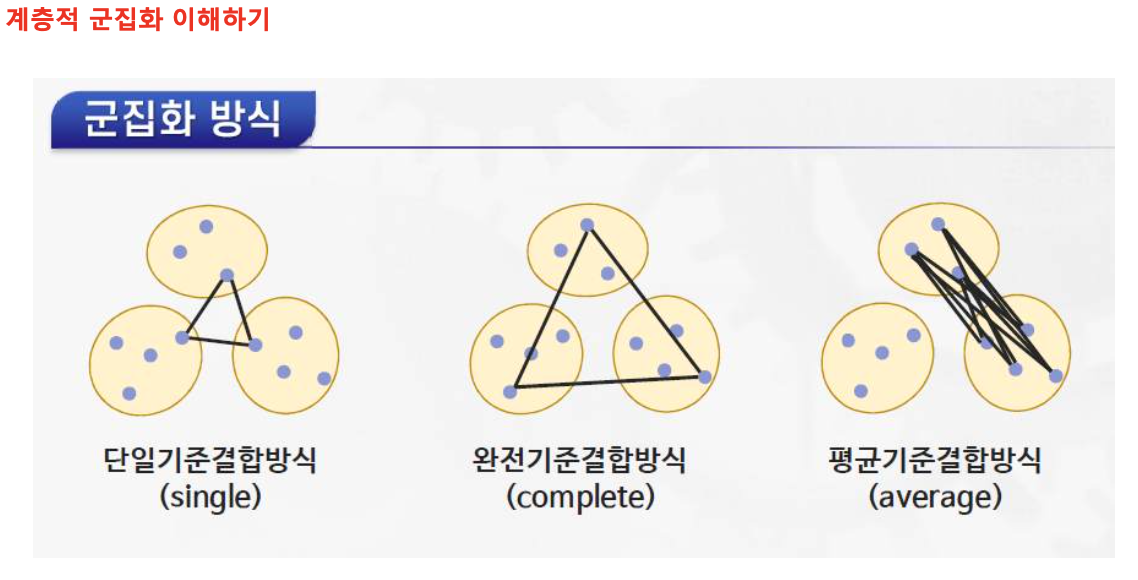

In [77]:
mergings = linkage(data, method='complete')

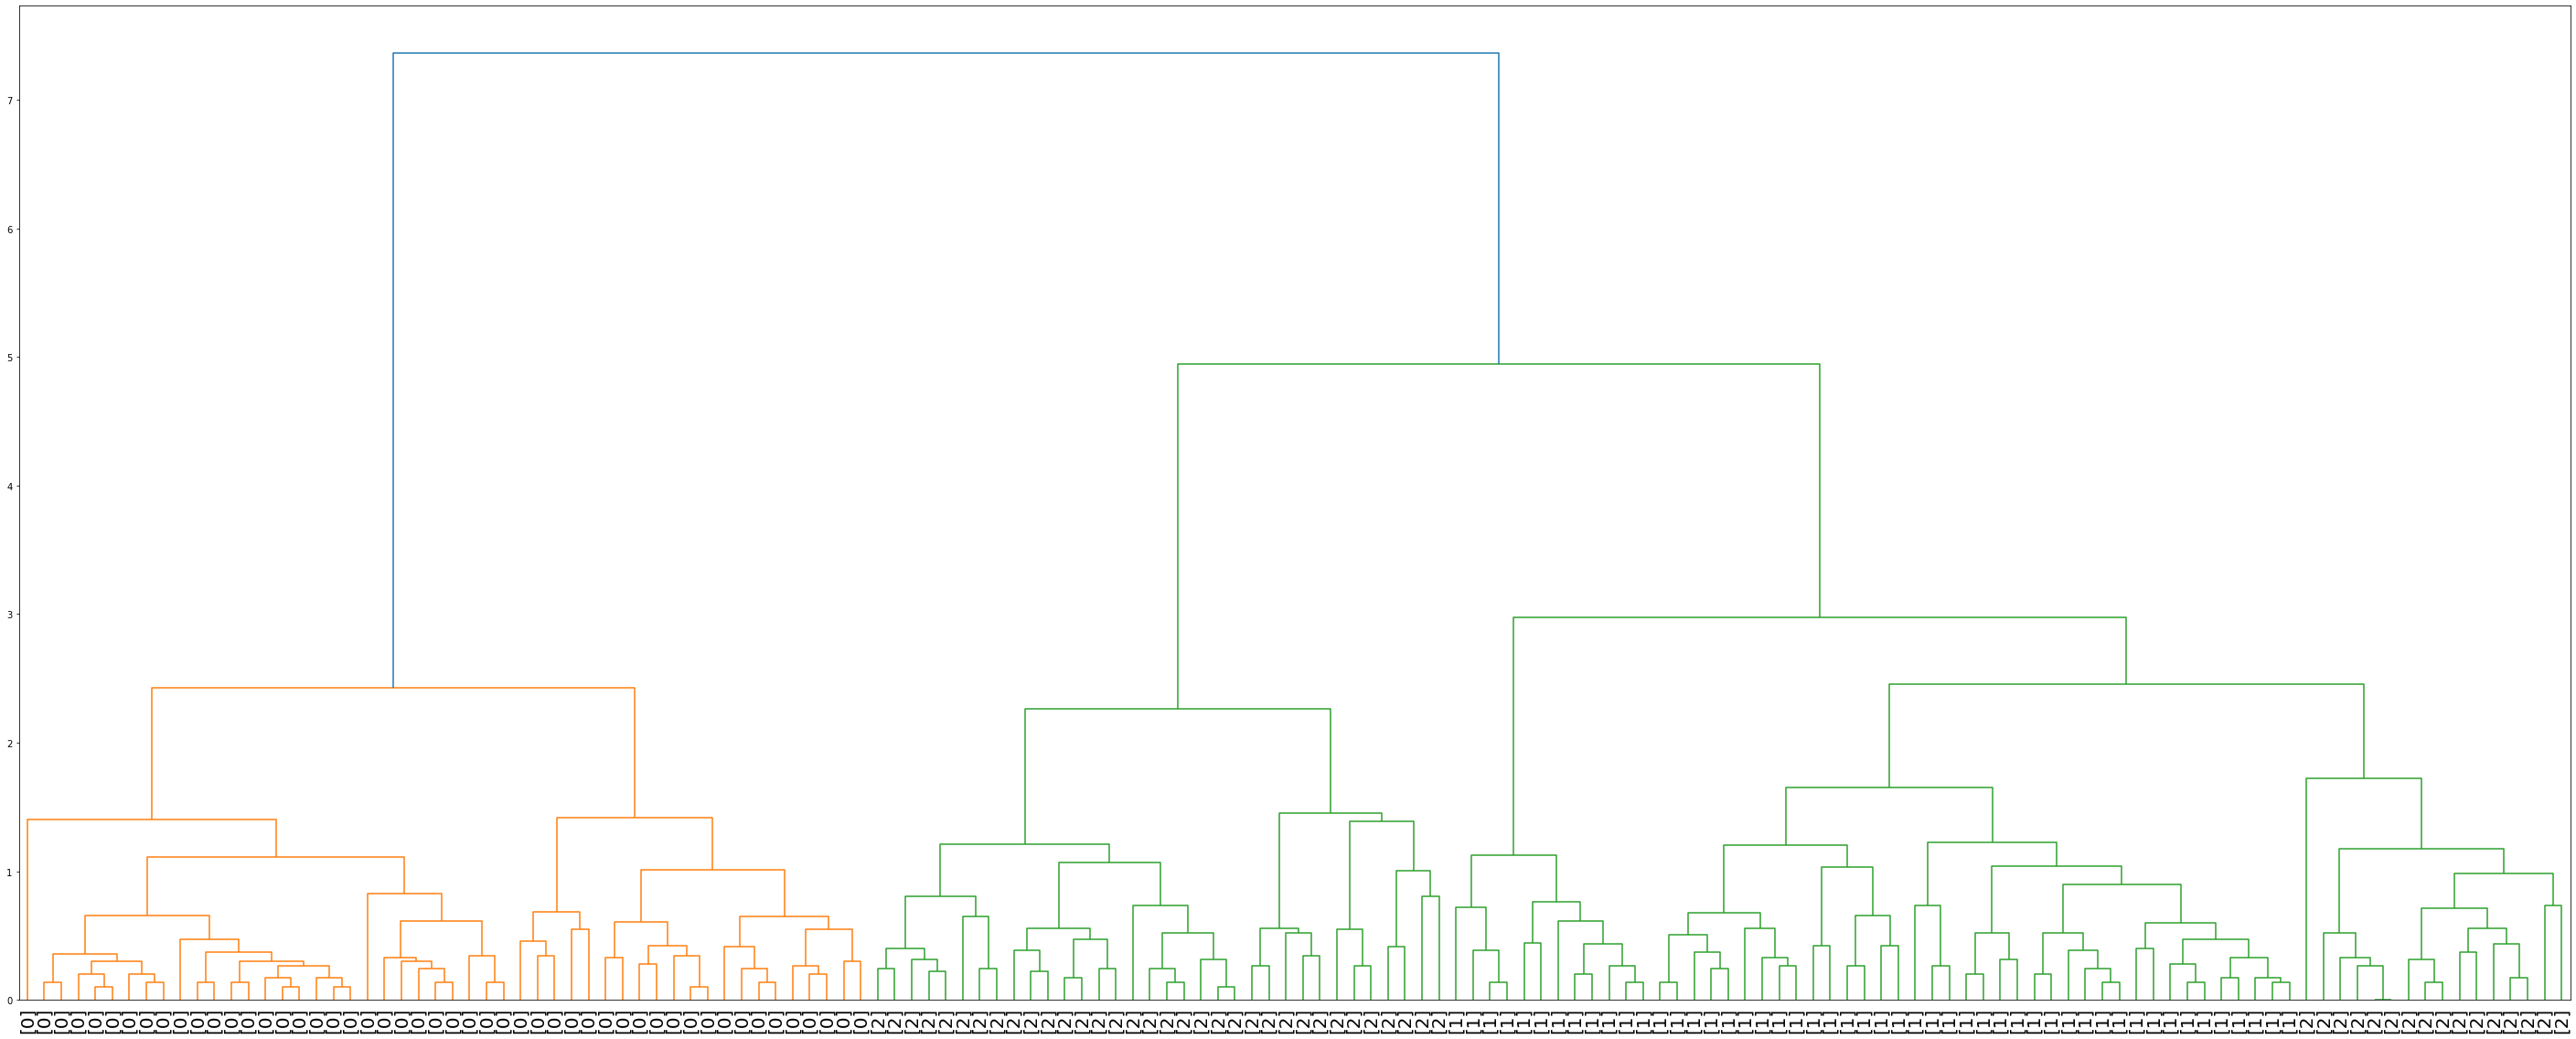

In [79]:
plt.figure(figsize=(40,20))

dendrogram(mergings, labels=labels.values, 
           leaf_rotation=90, # 글자 각도
           leaf_font_size=20 # 글자 크기
          )

plt.show()

# 밀도기반 클러스터링 : DBSCAN

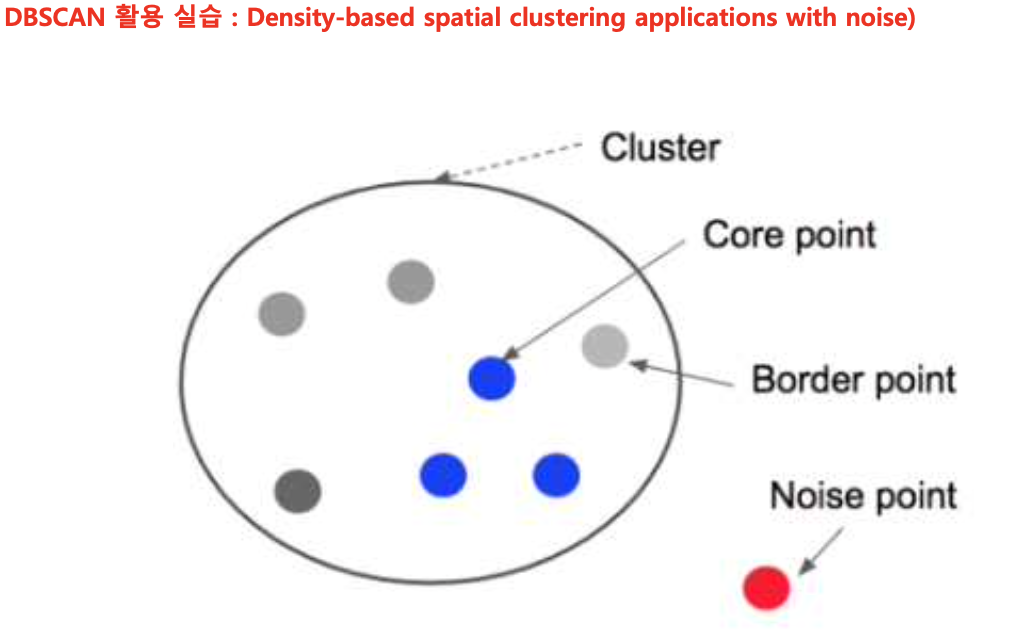

- border point : 군집을 이루고 있지만 종류가 다르다.
- core point : 각 원의 핵심 포인트
- noise point : 아무데도 속하지 못한 것.

- 주피터노트북에서 차트나 그래프를 사용할 때 한글은 오류가 발생한다.

In [81]:
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='appleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system.... sorry.....')

In [85]:
import platform
platform.system()

'Darwin'

- 폰트 업데이트

In [ ]:
import matplotlib
matplotlib.font_manager.rcParams

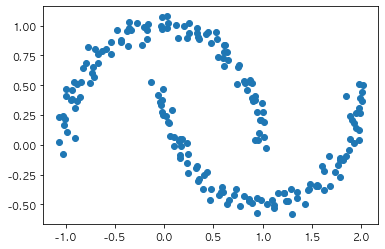

In [87]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np

from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

import warnings
warnings.filterwarnings(action='ignore')

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

plt.scatter(X[:, 0], X[:, 1])
plt.show()

- 1차원데이터 : 점 (벡터)
- 2차원데이터 : 매트릭스

findfont: Font family ['MalgunGothic'] not found. Falling back to DejaVu Sans.


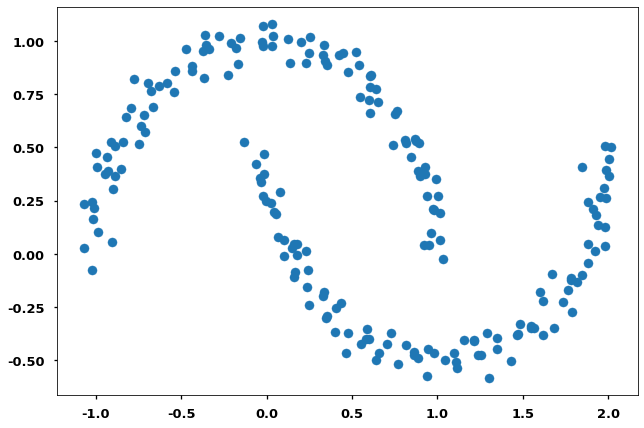

In [90]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np

from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

import warnings
warnings.filterwarnings(action='ignore')

style.use('seaborn-talk')

krfont = {'family': 'MalgunGothic', 'weight': 'bold', 'size' : 10}

matplotlib.rc('font', **krfont)
matplotlib.rcParams['axes.unicode_minus'] = False  # 한글과 마이너스 기호를 

X, y = make_moons(n_samples=200, noise=0.05, random_state=0) # noise : 위 아래 100개 씩

plt.scatter(X[:, 0], X[:, 1])
plt.show()

### k-means 클러스터링으로 분류

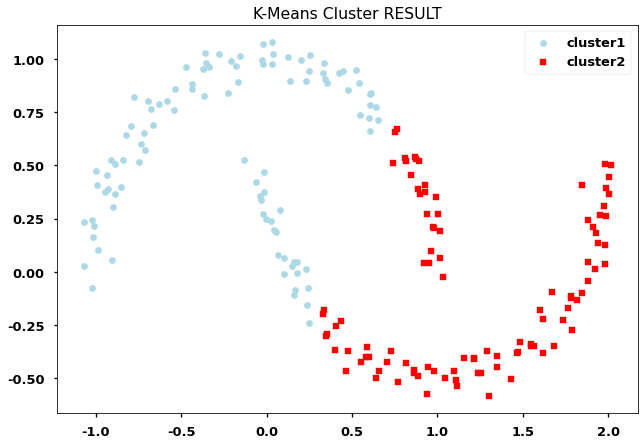

In [92]:
import matplotlib
matplotlib.font_manager.rcParams

def plotResult(X, y, title='Clustering') :
    plt.scatter(X[y==0, 0], X[y==0, 1], c='lightblue',
               marker='o', s=40, label='cluster1')
    
    plt.scatter(X[y==1, 0], X[y==1, 1], c='red',
           marker='s', s=40, label='cluster2')
    
    plt.title(title)
    plt.legend()
    plt.show()
    
km = KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(X)

plotResult(X, y_km, title='K-Means Cluster RESULT')

### DBSCAN 분류 : 밀도기반

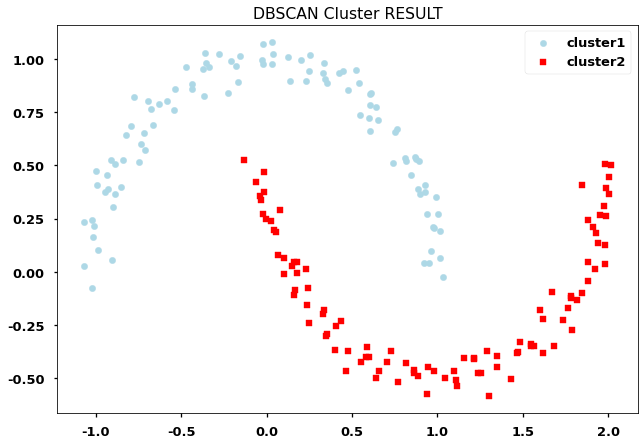

In [93]:
import matplotlib
matplotlib.font_manager.rcParams

def plotResult(X, y, title='Clustering') :
    plt.scatter(X[y==0, 0], X[y==0, 1], c='lightblue',
               marker='o', s=40, label='cluster1')
    
    plt.scatter(X[y==1, 0], X[y==1, 1], c='red',
           marker='s', s=40, label='cluster2')
    
    plt.title(title)
    plt.legend()
    plt.show()
    
db = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
y_db = db.fit_predict(X)

plotResult(X, y_db, title='DBSCAN Cluster RESULT')

# 실습 : 학교알리미 정보분석

# https://www.schoolinfo.go.kr

- 서울 시내 중학교 진학률 엑셀 데이터 셋 : 2016년 자료

- 엑셀관련 모듈 설치

In [95]:
# 엑셀파일안의 시트에서 데이터를 읽어온다.
!pip install xlrd

     |████████████████████████████████| 96 kB 10.3 MB/s            


In [96]:
# 엑셀파일안의 지정된 시트에 데이터를 작성한다.
!pip install xlwt

     |████████████████████████████████| 99 kB 9.9 MB/s             


In [97]:
# 엑셀파일을 생성한다.
!pip install xlsxwriter

     |████████████████████████████████| 149 kB 11.1 MB/s            


In [99]:
# 파이썬과 엑셀파일 연동
!pip install openpyxl

     |████████████████████████████████| 242 kB 11.5 MB/s            


In [100]:
import pandas as pd

In [101]:
# engine='openpyxl' 이 구문은 생략해도 결과는 같다.

df = pd.read_excel('2016_middle_shcool_graduates_report.xlsx',
                  header=0, engine='openpyxl')

pd.set_option('display.width', None)      # 출력화면 너비
pd.set_option('display.max_rows', 100)    # 출력할 행의 개수
pd.set_option('display.max_columns', 10)  # 출력할 열의 개수
pd.set_option('display.max_colwidth', 20) # 출력할 열의 너비
pd.set_option('display.unicode.east_asian_width', True)

In [102]:
print(df.columns.values)

['Unnamed: 0' '지역' '학교명' '코드' '유형' '주야' '남학생수' '여학생수' '일반고' '특성화고' '과학고'
 '외고_국제고' '예고_체고' '마이스터고' '자사고' '자공고' '기타진학' '취업' '미상' '위도' '경도']


In [103]:
df.head()

,Unnamed: 0,지역,학교명,코드,유형,...,기타진학,취업,미상,위도,경도
0,0,성북구,서울대학교사범대학부설중학교...,3,국립,...,0.004,0,0.000,37.594942,127.038909
1,1,종로구,서울대학교사범대학부설여자중학교...,3,국립,...,0.031,0,0.000,37.577473,127.003857
2,2,강남구,개원중학교,3,공립,...,0.009,0,0.003,37.491637,127.071744
3,3,강남구,개포중학교,3,공립,...,0.019,0,0.000,37.480439,127.062201
4,4,서초구,경원중학교,3,공립,...,0.010,0,0.000,37.510750,127.008900


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415 entries, 0 to 414
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  415 non-null    int64  
 1   지역          415 non-null    object 
 2   학교명         415 non-null    object 
 3   코드          415 non-null    int64  
 4   유형          415 non-null    object 
 5   주야          415 non-null    object 
 6   남학생수        415 non-null    int64  
 7   여학생수        415 non-null    int64  
 8   일반고         415 non-null    float64
 9   특성화고        415 non-null    float64
 10  과학고         415 non-null    float64
 11  외고_국제고      415 non-null    float64
 12  예고_체고       415 non-null    float64
 13  마이스터고       415 non-null    float64
 14  자사고         415 non-null    float64
 15  자공고         415 non-null    float64
 16  기타진학        415 non-null    float64
 17  취업          415 non-null    int64  
 18  미상          415 non-null    float64
 19  위도          415 non-null    f

In [105]:
df.describe()

,Unnamed: 0,코드,남학생수,여학생수,일반고,...,기타진학,취업,미상,위도,경도
count,415.000000,415.000000,415.000000,415.000000,415.000000,...,415.000000,415.0,415.000000,415.000000,415.000000
mean,207.000000,3.197590,126.532530,116.173494,0.623080,...,0.069571,0.0,0.001670,37.491969,127.032792
std,119.944432,0.804272,79.217906,76.833082,0.211093,...,0.235630,0.0,0.003697,0.348926,0.265245
min,0.000000,3.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,34.979940,126.639561
25%,103.500000,3.000000,80.000000,71.500000,0.566500,...,0.000000,0.0,0.000000,37.501934,126.921758
50%,207.000000,3.000000,129.000000,118.000000,0.681000,...,0.007000,0.0,0.000000,37.547702,127.013579
75%,310.500000,3.000000,177.500000,161.500000,0.758000,...,0.015000,0.0,0.003000,37.590670,127.071265
max,414.000000,9.000000,337.000000,422.000000,0.908000,...,1.000000,0.0,0.036000,37.694777,129.106974


- 지도 출력

In [ ]:
!pip install folium

In [107]:
import folium

mschool_map = folium.Map(location=[37.55, 126.98],
                        tiles='Stamen terrain',
                        zoom_start=12)

- 서울 시내 중학교를 지도에 원으로 표시

In [110]:
for name, lat, lng in zip(df.학교명, df.위도, df.경도):

    folium.CircleMarker([lat, lng],
                       radius=5,
                       color='red',
                       fill=True,
                       fill_color='yellow',
                       fill_opacity=0.7,
                       popup=name).add_to(mschool_map)
    
mschool_map

- 파일로 저장

In [112]:
mschool_map.save('./mschool.html')

# 데이터 전처리

In [113]:
# 원핫인코딩(더미 변수)
from sklearn import preprocessing    

label_encoder = preprocessing.LabelEncoder()     # 범주형데이터를 수치형데이터로
onehot_encoder = preprocessing.OneHotEncoder()   # one hot encoder 생성

onehot_location = label_encoder.fit_transform(df['지역'])
onehot_code = label_encoder.fit_transform(df['코드'])
onehot_type = label_encoder.fit_transform(df['유형'])
onehot_day = label_encoder.fit_transform(df['주야'])

df['location'] = onehot_location
df['code'] = onehot_code
df['type'] = onehot_type
df['day'] = onehot_day

df.head()

,Unnamed: 0,지역,학교명,코드,유형,...,경도,location,code,type,day
0,0,성북구,서울대학교사범대학부설중학교...,3,국립,...,127.038909,16,0,1,0
1,1,종로구,서울대학교사범대학부설여자중학교...,3,국립,...,127.003857,22,0,1,0
2,2,강남구,개원중학교,3,공립,...,127.071744,0,0,0,0
3,3,강남구,개포중학교,3,공립,...,127.062201,0,0,0,0
4,4,서초구,경원중학교,3,공립,...,127.008900,14,0,0,0


## DBSCAN 분류

In [114]:
from sklearn import cluster

# 분석에 사용할 속성으로 과학고, 외고_국제고, 자사고 진학률
columns_list = [10, 11, 14]
X = df.iloc[:, columns_list]

X[:5]

,과학고,외고_국제고,자사고
0,0.018,0.007,0.227
1,0.000,0.035,0.043
2,0.009,0.012,0.090
3,0.013,0.013,0.065
4,0.007,0.010,0.282


- 정규화 작업

In [115]:
X = preprocessing.StandardScaler().fit(X).transform(X)

- DBSCAN 모델 객체 생성

In [116]:
dbm = cluster.DBSCAN(eps=0.2, min_samples=5)

- 모델 학습

In [117]:
dbm.fit(X)

DBSCAN(eps=0.2)

- 예측(군집화)

In [118]:
cluster_label = dbm.labels_
cluster_label

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,
       -1, -1, -1,  2, -1,  0, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1,
        0,  3, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1,  1,  0, -1, -1, -1,
        0, -1, -1, -1, -1,  0, -1,  0,  0, -1, -1,  0, -1, -1, -1,  0,  0,
       -1, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0,  2,  0,  0,  0,  0,  0,
       -1, -1, -1,  0, -1,  0, -1, -1,  0, -1,  0, -1,  0,  0, -1, -1, -1,
       -1,  1,  0, -1,  0,  0, -1, -1, -1,  0, -1, -1, -1, -1, -1,  0,  1,
       -1, -1,  0,  2,  0, -1, -1,  1, -1, -1, -1,  0,  0,  0, -1, -1,  0,
       -1, -1, -1,  0,  0, -1, -1, -1, -1,  0, -1, -1, -1,  0, -1, -1, -1,
        0, -1,  0,  0, -1, -1, -1, -1, -1,  0, -1,  0,  0, -1, -1, -1, -1,
       -1,  0, -1, -1, -1,  1,  0,  3,  1, -1,  0,  0, -1,  0, -1, -1,  0,
        0,  2, -1, -1,  3,  0,  0, -1, -1, -1, -1,  0, -1,  0,  0, -1,  0,
        0,  0, -1, -1,  0, -1, -1, -1, -1, -1,  2,  0, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

- 예측결과를 데이터프레임에 추가

In [119]:
df['Cluster'] = cluster_label
df.head()

,Unnamed: 0,지역,학교명,코드,유형,...,location,code,type,day,Cluster
0,0,성북구,서울대학교사범대학부설중학교...,3,국립,...,16,0,1,0,-1
1,1,종로구,서울대학교사범대학부설여자중학교...,3,국립,...,22,0,1,0,-1
2,2,강남구,개원중학교,3,공립,...,0,0,0,0,-1
3,3,강남구,개포중학교,3,공립,...,0,0,0,0,-1
4,4,서초구,경원중학교,3,공립,...,14,0,0,0,-1
